In [2]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import csv
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

open csv file and save it as a dictionary

In [3]:
csv_file = 'filtered_stock.csv'

data = {}

# Read data from the CSV file
with open(csv_file, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        key = row['Key']
        values = row['Values'].split(', ')  # Split the values by commas
        data[key] = values
        
# Now 'data' contains the dictionary you originally wrote to the CSV file
print(data.keys())

dict_keys(['transportation', 'materials', 'consumer-services', 'energy', 'pharmaceuticals-biotech', 'healthcare', 'consumer-retailing', 'real-estate', 'capital-goods', 'retail', 'software', 'utilities', 'food-beverage-tobacco', 'telecom', 'automobiles', 'diversified-financials', 'consumer-durables', 'household', 'tech', 'banks', 'insurance', 'semiconductors', 'commercial-services', 'media'])


Fetch the earning call dates for each companies

In [10]:
raw_earn_dict = {}

for inds in data:
    file_loc = '../sectors/' + inds 
    
    for cmp in data[inds]:
        folder_names = glob.glob(file_loc + '/' + cmp + '/*') #folder_names contain name of all earnings call files of the selected company
        
        for name in folder_names:
            if 'names' in name:
                folder_names.remove(name) #remove the file with presentor names
                
        raw_earn_dates = []
        
        for earn_logs in folder_names:
            file = open(earn_logs, encoding='utf8') #added encoding = 'utf8' because my OS is in Korean
            earn_log = csv.reader(file)
            next(earn_log)
            next(earn_log)
            earn_date = next(earn_log) #get the earnings call date and time            
            raw_earn_dates.append(earn_date)
            
        if(len(folder_names) != len(raw_earn_dates)):
            print('error')
            
        raw_earn_dict[cmp] = raw_earn_dates #append earn-dates to dictionary earn_dict with key being the company name and element being earnings call dates

raw_earn_dict['SCHN.SW'] = raw_earn_dict.pop('SCHN')

print(raw_earn_dict.keys(), len(raw_earn_dict.keys()))

KeyboardInterrupt: 

Modify the date to accommodate the time

In [5]:
date_format_full = '%Y-%m-%d %H:%M:%S'
count = 0
earn_dict = {}

for inds in data:
    
    for cmp in data[inds]:
        earn_dates = []
        if cmp == 'SCHN':
            cmp = 'SCHN.SW'
        for earn_date in raw_earn_dict[cmp]:
            datetime_earn_date = datetime.strptime(earn_date[0], date_format_full)
            datetime_earn_open = datetime_earn_date.replace(hour = 9, minute = 30)
            datetime_earn_close = datetime_earn_date.replace(hour = 16, minute = 0)
            
            if datetime_earn_open < datetime_earn_date and datetime_earn_date < datetime_earn_close:
                #print(cmp + ' in industry ' + inds + ', earnings call happened during marekt time. date: ' + str(datetime_earn_date))
                count += 1 # check if earnings call was happened during market time
                
            elif datetime_earn_date < datetime_earn_open:
                datetime_earn_date -= timedelta(days=1)
                #print('change to date, new date is :' + str(datetime_earn_date))
                # check if earnings call was happened before market open time
                
                earn_dates.append(str(datetime_earn_date.date())) #append the dates to earn_dates
            
            else:
                earn_dates.append(str(datetime_earn_date.date())) #append the dates to earn_dates
            
        if(len(earn_dates) != 0):
            earn_dict[cmp] = earn_dates

for cmp in earn_dict.keys():
    print(cmp, len(earn_dict[cmp]))

SB 29
ULCC 5
PANL 21
AAL 26
RLGT 29
GNK 29
CAR 50
ARCB 35
CPA 41
DSKE 15
FWRD 35
WERN 12
TSP 5
SBLK 49
XPO 33
LYFT 15
SNCY 6
ULH 15
SKYW 39
JOBY 5
R 52
GOGL 16
ALK 41
KEX 37
ALGT 39
CHRW 54
LSTR 46
ZIM 2
NETI 1
KNX 17
UP 5
GSL 32
CMRE 27
HA 39
SNDR 18
YMM 1
HUBG 35
EGLE 18
DAC 29
SAVE 32
UHAL 32
MATX 40
JBLU 54
ATSG 35
DSX 48
CAAP 7
CVLG 4
CDE 54
AMR 4
CMC 48
PCT 4
LXU 35
DRD 5
CMP 41
CBT 40
EMN 47
AXTA 24
BERY 38
TROX 33
NEXA 2
HAYN 28
BIOX 4
SMG 40
HL 53
MUX 25
NEU 38
IPI 50
TRS 37
SLGN 42
PTVE 1
RYI 25
KRO 5
TSE 25
SEE 55
VVV 17
SXT 32
CCK 44
PACK 3
CLF 48
GEF 39
BVN 25
SCHN.SW 41
LPX 55
MERC 37
HUN 54
CENX 58
OEC 23
BCPC 40
KOP 35
TX 26
MTRN 35
ECVT 5
IOSP 32
LOMA 7
KALU 40
CSTM 29
SUM 20
SLVM 3
AMBP 3
AVD 38
MYE 29
MP 8
GSM 31
ASPN 29
HCC 36
AA 60
GPK 53
ESI 17
TMST 21
ASH 40
RGLD 39
SCL 33
ATR 40
CC 18
CRS 52
ATI 51
KWR 32
FF 12
FMC 46
DNA 5
WOR 35
AVNT 2
EXP 32
OI 45
MTX 37
OLN 53
CLW 36
NGVT 19
MATV 31
X 46
LTHM 15
SXC 29
ZEUS 51
WRK 36
ASIX 13
FUL 33
TMC 5
METC 13
DENN 44
LRN 

Check if there are no null values

In [6]:
for cmp in earn_dict.keys():
    if(len(earn_dict[cmp]) == 0):
        print(cmp, earn_dict[cmp])

In [44]:
print('total count of earnings call during market time: ' + str(count))

total count of earnings call during market time: 5264


Write the earning call date dictionary as csv file 

In [7]:
csv_file = 'earning_call_dates.csv'

with open(csv_file, 'w', newline='') as csvfile:
    fieldnames = ['Key', 'Values']  # Define the CSV header
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header row
    writer.writeheader()
    
    # Write data from the dictionary to the CSV
    for key, values in earn_dict.items():
        writer.writerow({'Key': key, 'Values': ', '.join(values)})

Open the earnings call date dictionary file

In [9]:
csv_file = 'earning_call_dates.csv'

earn_dict = {}

# Read data from the CSV file
with open(csv_file, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        key = row['Key']
        values = row['Values'].split(', ')  # Split the values by commas
        earn_dict[key] = values

# Now 'data' contains the dictionary you originally wrote to the CSV file

Create folders for each industires

In [8]:
if not os.path.exists('statistical_data'):
    os.mkdir('statistical_data')

for inds in data:
    if not os.path.exists('statistical_data/' + inds):
        os.mkdir('statistical_data/' + inds)
        
    for cmp in data[inds]:
        if cmp == 'SCHN':
            cmp = 'SCHN.SW'
        if not(cmp in earn_dict.keys()):
            continue
        if not os.path.exists('statistical_data/' + inds + '/' + cmp):
            os.mkdir('statistical_data/' + inds + '/' + cmp)

Create a dataframe for each company with stock prices for various dates 

In [10]:
date_format = '%Y-%m-%d'
currwd = os.getcwd()

for inds in data:
    
    if not(inds == 'software' or inds == 'tech'):
        continue
        
    earn_impc_price = pd.DataFrame(columns = ['Day +1', 'Day +2', 'Day +7', 'Day +28', 'Day +63'])
    earn_impc_perc = pd.DataFrame(columns = ['Day +1', 'Day +2', 'Day +7', 'Day +28', 'Day +63'])
    #create two dataframes, one for recording average price gap and the other for recording avearge price percentage change.
    
    for cmp in data[inds]:
            
        print(inds, cmp)
        if cmp == 'SCHN':
            cmp = 'SCHN.SW'
        if not(cmp in earn_dict.keys()):
            continue
        
        price_df = pd.DataFrame(columns=['Day 0', 'Day +1', 'Day +2', 'Day +7', 'Day +28', 'Day +63'])
        price_gap = pd.DataFrame(columns=['Day +1', 'Day +2', 'Day +7', 'Day +28', 'Day +63'])
        price_perc = pd.DataFrame(columns=['Day +1', 'Day +2', 'Day +7', 'Day +28', 'Day +63'])
        #create three dataframes, one for tracking price data, one for tracking price gap, one for tracking price percentage change
        if(cmp == 'NEX' or cmp == 'NUVA'):
            continue
        yfdata = yf.download(cmp) 
        yfdata_index = list(yfdata.index) # get the list of dates available from yfdata
        
        datetime_start_date = datetime.strptime(earn_dict[cmp][0], date_format) # mark the starting date from earnings call dates
        
        orig_count = len(earn_dict[cmp])
        remove_count = 0
        while(datetime_start_date < yfdata_index[0]):
            remove_count += 1
            earn_dict[cmp] = earn_dict[cmp][1:]
            # if the earliest earnings call date is before the earliest accessable stock price date, remove that date earnings call date
            
            if len(earn_dict[cmp]) == 0:
                # if there are no more earnings call date for this company, stop iteration
                break
                
            datetime_start_date = datetime.strptime(earn_dict[cmp][0], date_format)
            # get new start date to compare
            
            print('stock price not accessible in this date. Recalibrating start date to: ' + str(datetime_start_date))
            
        if len(earn_dict[cmp]) == 0:
            print('none of ' + cmp + ' stock information on earnings call dates are accessible')
            # if there are no more earnings call date for this company, stop iteration
            continue
        
        if remove_count == orig_count:
            continue
                
        for earn_date in earn_dict[cmp]:
            # iterate through the earnings call dates of each companies. Remove last item since it may not have sufficient information
                                    
            datetime_earn_date = datetime.strptime(earn_date, date_format)
            # convert string dates to datetime objects for comparison
            
            while not(datetime_earn_date in yfdata.index):
                #print('datetime not accessible. current datetime: ' + str(datetime_earn_date))
                datetime_earn_date -= timedelta(days = 1) # If the earnings call date is not a market open date, go back a day until it is
                #print('new datetime: ' + str(datetime_earn_date))
            
            key_index = yfdata_index.index(datetime_earn_date) # Get the index number of the earnings call date
            
            factor = yfdata.loc[yfdata_index[key_index]].at['Close'] / yfdata.loc[yfdata_index[key_index]].at['Adj Close']
            
            df_row = {'Day 0': yfdata.loc[yfdata_index[key_index]].at['Adj Close'],
                      'Day +1': yfdata.loc[yfdata_index[key_index+1]].at['Open'] / factor,
                      'Day +2': yfdata.loc[yfdata_index[key_index+2]].at['Open'] / factor,
                      'Day +7': yfdata.loc[yfdata_index[key_index+5]].at['Open'] / factor,
                      'Day +28': yfdata.loc[yfdata_index[key_index+20]].at['Open'] / factor, 
                      'Day +63': yfdata.loc[yfdata_index[key_index+45]].at['Open'] / factor}
            # Get the closing price of the stock before earnings call, and compare with the opening price of
            # four days: the day right after the earnings call, 2 days later, a week later, and a month later
            
            #print(df_row)
            
            price_df.loc[earn_date] = df_row
            
            gap_row = {'Day +1': df_row['Day +1'] - df_row['Day 0'], 
                       'Day +2': df_row['Day +2'] - df_row['Day 0'], 
                       'Day +7': df_row['Day +7'] - df_row['Day 0'], 
                       'Day +28': df_row['Day +28'] - df_row['Day 0'], 
                       'Day +63': df_row['Day +63'] - df_row['Day 0']}
            # From df_row, calculate the gap between closing price of stock before earnings call with four opening prices.
            
            price_gap.loc[earn_date] = gap_row
            
            perc_row = {'Day +1': (df_row['Day +1'] / df_row['Day 0'])*100 -100, 
                       'Day +2': (df_row['Day +2'] / df_row['Day 0'])*100 - 100, 
                       'Day +7': (df_row['Day +7'] / df_row['Day 0'])*100 - 100, 
                       'Day +28': (df_row['Day +28'] / df_row['Day 0'])*100 - 100,
                       'Day +63': (df_row['Day +63'] / df_row['Day 0'])*100 - 100 }
            #From df_row, calculate the percentage change between closing price of stock before earnings call with four opening prices.
            
            price_perc.loc[earn_date] = perc_row
            
        #print(price_df)
        #print(price_gap)
        #print(price_perc)
        if not os.path.exists(currwd + '/statistical_data/' + inds + '/' + cmp + '/' + cmp + 'price_gap.csv'):
            price_gap.to_csv(currwd + '/statistical_data/' + inds + '/' + cmp + '/' + cmp + 'price_gap.csv', sep=',', index=True, encoding='utf-8')
        
        if not os.path.exists(currwd + '/statistical_data/' + inds + '/' + cmp + '/' + cmp + 'price_perc.csv'):
            price_perc.to_csv(currwd + '/statistical_data/' + inds + '/' + cmp + '/' + cmp + 'price_perc.csv', sep=',', index=True, encoding='utf-8')
        
        gap_sum_1 = 0
        gap_sum_2 = 0
        gap_sum_7 = 0
        gap_sum_28 = 0
        gap_sum_63 = 0
        
        for chng in price_gap['Day +1']:
            gap_sum_1 += abs(chng)
        
        for chng in price_gap['Day +2']:
            gap_sum_2 += abs(chng)
            
        for chng in price_gap['Day +7']:
            gap_sum_7 += abs(chng)
        
        for chng in price_gap['Day +28']:
            gap_sum_28 += abs(chng)
            
        for chng in price_gap['Day +63']:
            gap_sum_63 += abs(chng)
            
        gap_avg_row = {'Day +1': gap_sum_1 / len(price_gap['Day +1']), 
                       'Day +2': gap_sum_2 / len(price_gap['Day +1']), 
                       'Day +7': gap_sum_7 / len(price_gap['Day +1']), 
                       'Day +28': gap_sum_28 / len(price_gap['Day +1']), 
                       'Day +63': gap_sum_63 / len(price_gap['Day +1'])}
        #get the average of price gaps(abs value) of each day and save it as a dataframe
        
        #print(cmp, gap_avg_row)
        
        earn_impc_price.loc[cmp] = gap_avg_row
        #print(earn_impc_price)
        
        perc_sum_1 = 0
        perc_sum_2 = 0
        perc_sum_7 = 0
        perc_sum_28 = 0
        perc_sum_63 = 0
        
        for chng in price_perc['Day +1']:
            perc_sum_1 += abs(chng)
        
        for chng in price_perc['Day +2']:
            perc_sum_2 += abs(chng)
            
        for chng in price_perc['Day +7']:
            perc_sum_7 += abs(chng)
        
        for chng in price_perc['Day +28']:
            perc_sum_28 += abs(chng)
        
        for chng in price_perc['Day +63']:
            perc_sum_63 += abs(chng)
            
        perc_avg_row = {'Day +1': perc_sum_1 / len(price_perc['Day +1']), 
                       'Day +2': perc_sum_2 / len(price_perc['Day +1']), 
                       'Day +7': perc_sum_7 / len(price_perc['Day +1']), 
                       'Day +28': perc_sum_28 / len(price_perc['Day +1']), 
                        'Day +63': perc_sum_63 / len(price_perc['Day +1'])}
        #get the average of price percentage change(abs value) of each day and save it as a dataframe
        
        #print(cmp, perc_avg_row)
        earn_impc_perc.loc[cmp] = perc_avg_row
    
    print(inds, earn_impc_perc)
    
    if not os.path.exists(currwd + '/statistical_data/' + inds + '/'+ inds + '_price_gap.csv'):
        earn_impc_price.to_csv(currwd + '/statistical_data/' + inds + '/'+ inds + '_price_gap.csv', sep=',', index=True, encoding='utf-8')
    
    if not os.path.exists(currwd + '/statistical_data/' + inds + '/'+ inds + '_price_perc.csv'):
        earn_impc_perc.to_csv(currwd + '/statistical_data/' + inds + '/' + inds + '_price_perc.csv', sep=',', index=True, encoding='utf-8')
    
    #save the data for each companies to csv file for further analysis
    
    

software DXC
[*********************100%%**********************]  1 of 1 completed
software TENB
[*********************100%%**********************]  1 of 1 completed
software ESMT
[*********************100%%**********************]  1 of 1 completed
software CCCS
[*********************100%%**********************]  1 of 1 completed
software GWRE
[*********************100%%**********************]  1 of 1 completed
software AYX
[*********************100%%**********************]  1 of 1 completed
software BOX
[*********************100%%**********************]  1 of 1 completed
stock price not accessible in this date. Recalibrating start date to: 2015-09-10 00:00:00
software BL
[*********************100%%**********************]  1 of 1 completed
software BILL
[*********************100%%**********************]  1 of 1 completed
software SPSC
[*********************100%%**********************]  1 of 1 completed
software TWKS
software WNS
[*********************100%%**********************]  1 of 1

[*********************100%%**********************]  1 of 1 completed
software PCOR
[*********************100%%**********************]  1 of 1 completed
software CVLT
[*********************100%%**********************]  1 of 1 completed
software TDC
[*********************100%%**********************]  1 of 1 completed
software APPF
[*********************100%%**********************]  1 of 1 completed
software RNG
[*********************100%%**********************]  1 of 1 completed
software SQSP
[*********************100%%**********************]  1 of 1 completed
software CNXC
software APPN
[*********************100%%**********************]  1 of 1 completed
software MNDY
[*********************100%%**********************]  1 of 1 completed
software FOUR
[*********************100%%**********************]  1 of 1 completed
software         Day +1     Day +2     Day +7    Day +28    Day +63
DXC   1.034003   3.382222   5.501011   6.823822   9.384537
TENB  6.004739   7.682738   9.956450  14.2187

[*********************100%%**********************]  1 of 1 completed
tech LFUS
[*********************100%%**********************]  1 of 1 completed
tech VSAT
[*********************100%%**********************]  1 of 1 completed
tech DGII
[*********************100%%**********************]  1 of 1 completed
tech TTMI
[*********************100%%**********************]  1 of 1 completed
tech KODK
[*********************100%%**********************]  1 of 1 completed
stock price not accessible in this date. Recalibrating start date to: 2006-05-05 00:00:00
stock price not accessible in this date. Recalibrating start date to: 2006-08-01 00:00:00
stock price not accessible in this date. Recalibrating start date to: 2006-10-31 00:00:00
stock price not accessible in this date. Recalibrating start date to: 2007-01-31 00:00:00
stock price not accessible in this date. Recalibrating start date to: 2007-11-01 00:00:00
stock price not accessible in this date. Recalibrating start date to: 2008-01-30 00:00

With the given data, we would further analyze the impact of earnings call on each industries

software


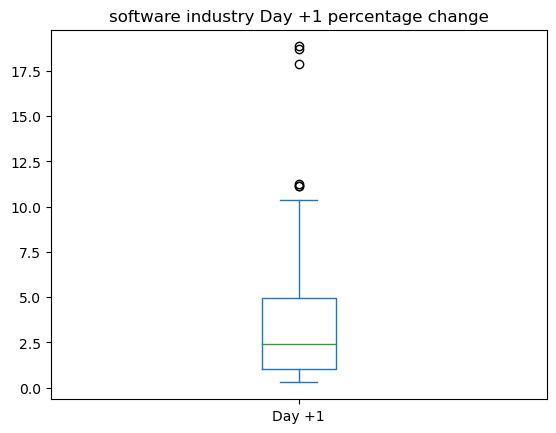

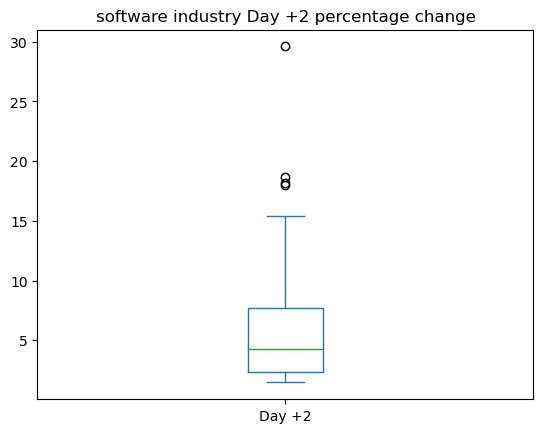

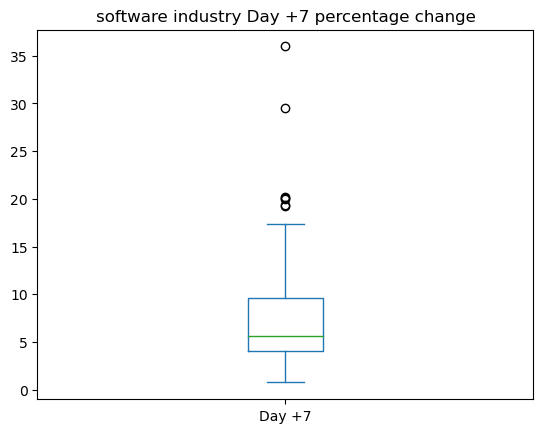

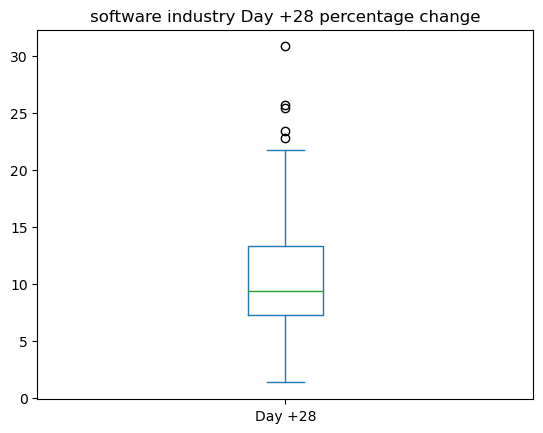

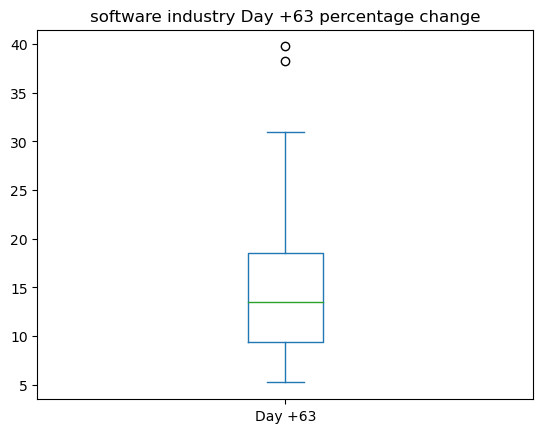

tech


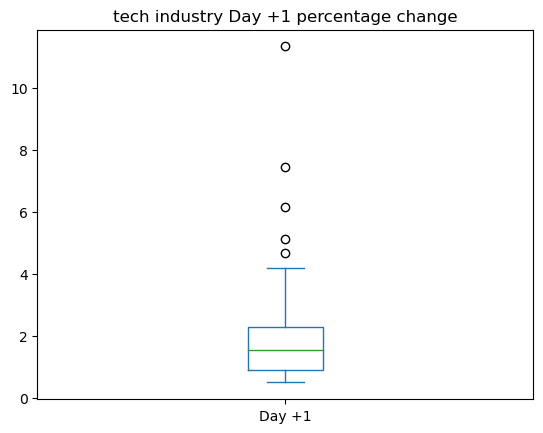

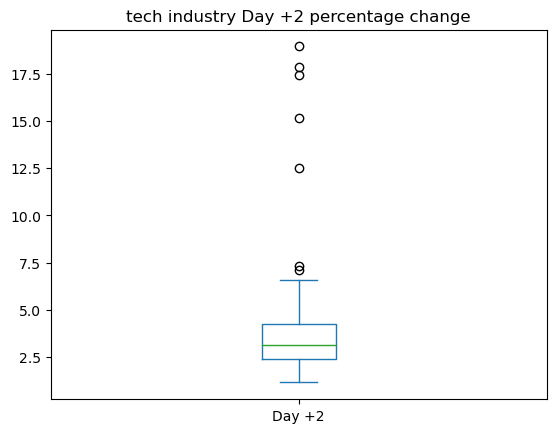

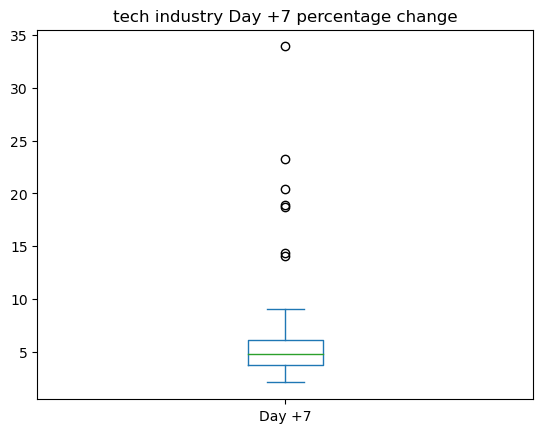

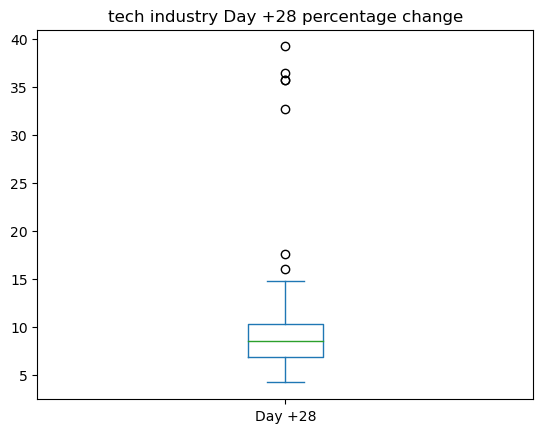

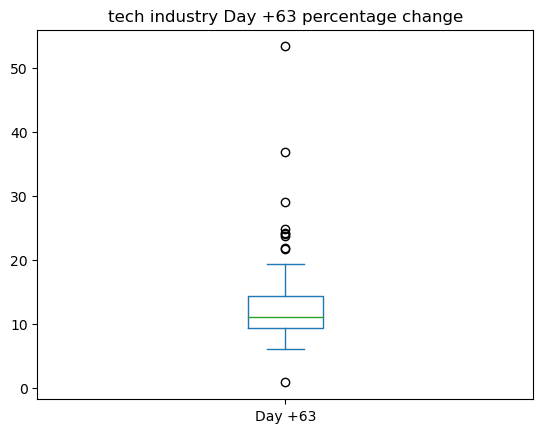

In [87]:

for inds in data:
    
    inds_gap = pd.DataFrame(columns = ['Day +1', 'Day +2', 'Day +7', 'Day +28', 'Day +63'])
    inds_perc = pd.DataFrame(columns = ['Day +1', 'Day +2', 'Day +7', 'Day +28', 'Day +63'])
    
    if not(inds == 'software' or inds == 'tech'):
        continue
    
    print(inds)
    
    csv_file = 'statistical_data/' + inds + '/' + inds + '_price_gap.csv'
    
    with open(csv_file, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
    
        for row in reader:
            key = row.pop('')
            for a in row:
                row[a] = float(row[a])
            inds_gap.loc[key] = row

    csv_file = 'statistical_data/' + inds + '/' + inds + '_price_perc.csv'
    
    with open(csv_file, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
    
        for row in reader:
            key = row.pop('')
            for a in row:
                row[a] = float(row[a])
            inds_perc.loc[key] = row    
    
    for day in inds_perc.columns:
        inds_perc[day].plot(title = inds + ' industry ' + str(day) + ' percentage change', kind = 'box')
        plt.savefig('statistical_data/'+inds+'/' + inds + '_industry_' + str(day) + 'percentage_change.png')
        plt.show()
        
    
    
    #plot a histogram of average percentage change of each companies within the industry
    
    #plt.boxplot(inds_gap_dict['Day +1'])
    #plt.show()
    #plot a boxplot of average percentage change to identify the distribution and outliers
    
    #loc_mean = sum(perc_gap['Day +1'])/len(perc_gap['Day +1'])
    #print('avg percentage change in ' + inds + 'industry on day +1 after earnings call = ' + loc_mean)
    #get the mean value of average percentage changes
    #this will represent the implication of earnings call on the particular industry
    
    #earn_impc_inds[inds] = loc_mean
    
#y_pos = np.arange(len(data))

#plt.bar(y_pos, earn_impc_inds['Day + 1'])
#plt.xticks(y_pos, earn_impc_inds.index)
#plt.show()
#Plot bar graph showing average percentage change after the earnings call of each industry

#fig = plt.figure()
